Dashboard Looker Studio : https://lookerstudio.google.com/reporting/5ead381a-2680-419d-86e5-e6be8fb95cba

# Topik

Shipping and Stock Performance Review on Q1 - Q2 2023

# Penjabaran

1. Ada berapa city di Thelook Ecommerce pada Q1 - Q2 tahun 2023?

2. City apa saja yang memiliki penjualan terbanyak dalam Q1 - Q2 tahun 2023?

3. Apakah city yang menjual produk terbanyak menghasilkan pendapatan terbanyak pada Q1 - Q2 tahun 2023?

4. Produk apa yang paling banyak terjual di Thelook Ecommerce pada Q1 - Q2 tahun 2023?

5. Produk apa saja yang memiliki pendapatan tertinggi pada Q1 - Q2 tahun 2023? (pendapatan = product retail price - cost)

6. Apakah produk yang berpendapatan paling tinggi terjual paling banyak di city berpendapatan tertinggi atau tidak?

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Data Loading

Data diperoleh dari database BigQuery database “thelook_ecommerce”

In [ ]:
df = pd.read_csv('Shipping and Stock Performance Review on Q1 - Q2 2023.csv')

# Query SQL

```
SELECT inventory.id, inventory.product_id, inventory.created_at, inventory.sold_at, 
inventory.cost, inventory.product_category, inventory.product_name, inventory.product_brand, 
inventory.product_retail_price, inventory.product_department, inventory.product_sku, 
orders.num_of_item ,inventory.product_distribution_center_id, distribution.name
FROM (
  SELECT *, 
         EXTRACT(YEAR FROM created_at) as year,
         EXTRACT(MONTH FROM created_at) as month
  FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
  WHERE created_at BETWEEN "2023-01-01" AND "2023-06-30"
) AS inventory
LEFT JOIN `bigquery-public-data.thelook_ecommerce.distribution_centers` AS distribution
ON inventory.product_distribution_center_id = distribution.id
LEFT JOIN `bigquery-public-data.thelook_ecommerce.order_items` AS oi
ON inventory.product_id = oi.product_id
LEFT JOIN `bigquery-public-data.thelook_ecommerce.orders` AS orders
ON oi.order_id = orders.order_id
WHERE inventory.year = 2023 AND inventory.month IN (1, 2, 3, 4, 5, 6)
```


# Eksplorasi Dataset

In [ ]:
# Melihat preview total dataframe
df 

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,num_of_item,product_distribution_center_id,name,year,month
0,77087,16898,2023-05-12 00:47:27 UTC,2023-05-24 12:05:27 UTC,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.000000,Men,22811EE19846217512507785E74D12CC,2,3,Houston TX,2023,5
1,77087,16898,2023-05-12 00:47:27 UTC,2023-05-24 12:05:27 UTC,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.000000,Men,22811EE19846217512507785E74D12CC,4,3,Houston TX,2023,5
2,77087,16898,2023-05-12 00:47:27 UTC,2023-05-24 12:05:27 UTC,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.000000,Men,22811EE19846217512507785E74D12CC,1,3,Houston TX,2023,5
3,77087,16898,2023-05-12 00:47:27 UTC,2023-05-24 12:05:27 UTC,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.000000,Men,22811EE19846217512507785E74D12CC,1,3,Houston TX,2023,5
4,77087,16898,2023-05-12 00:47:27 UTC,2023-05-24 12:05:27 UTC,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.000000,Men,22811EE19846217512507785E74D12CC,2,3,Houston TX,2023,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656346,395641,14581,2023-03-30 07:53:49 UTC,2023-04-26 10:56:49 UTC,10.465000,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,3,8,Mobile AL,2023,3
656347,395641,14581,2023-03-30 07:53:49 UTC,2023-04-26 10:56:49 UTC,10.465000,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,2,8,Mobile AL,2023,3
656348,73335,14392,2023-05-08 17:30:00 UTC,NaN,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,2,9,Charleston SC,2023,5
656349,73335,14392,2023-05-08 17:30:00 UTC,NaN,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,3,9,Charleston SC,2023,5


Dikarenakan salah menamakan kolom pada kolom "name" yang seharusnya adalah "city". Dilakukan penamaan ulang kolom.

In [ ]:
# Melakukan penamaan ulang menggunakan fungsi rename.

df=df.rename({'name':'city'}, axis=1)
df

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,num_of_item,product_distribution_center_id,city,year,month
0,77087,16898,2023-05-12 00:47:27 UTC,2023-05-24 12:05:27 UTC,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.000000,Men,22811EE19846217512507785E74D12CC,2,3,Houston TX,2023,5
1,77087,16898,2023-05-12 00:47:27 UTC,2023-05-24 12:05:27 UTC,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.000000,Men,22811EE19846217512507785E74D12CC,4,3,Houston TX,2023,5
2,77087,16898,2023-05-12 00:47:27 UTC,2023-05-24 12:05:27 UTC,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.000000,Men,22811EE19846217512507785E74D12CC,1,3,Houston TX,2023,5
3,77087,16898,2023-05-12 00:47:27 UTC,2023-05-24 12:05:27 UTC,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.000000,Men,22811EE19846217512507785E74D12CC,1,3,Houston TX,2023,5
4,77087,16898,2023-05-12 00:47:27 UTC,2023-05-24 12:05:27 UTC,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.000000,Men,22811EE19846217512507785E74D12CC,2,3,Houston TX,2023,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656346,395641,14581,2023-03-30 07:53:49 UTC,2023-04-26 10:56:49 UTC,10.465000,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,3,8,Mobile AL,2023,3
656347,395641,14581,2023-03-30 07:53:49 UTC,2023-04-26 10:56:49 UTC,10.465000,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,2,8,Mobile AL,2023,3
656348,73335,14392,2023-05-08 17:30:00 UTC,NaN,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,2,9,Charleston SC,2023,5
656349,73335,14392,2023-05-08 17:30:00 UTC,NaN,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,3,9,Charleston SC,2023,5


name telah diubah menjadi city

In [ ]:
# Melihat jenis data pada dataset, dan preview kasar.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656351 entries, 0 to 656350
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              656351 non-null  int64  
 1   product_id                      656351 non-null  int64  
 2   created_at                      656351 non-null  object 
 3   sold_at                         379994 non-null  object 
 4   cost                            656351 non-null  float64
 5   product_category                656351 non-null  object 
 6   product_name                    656322 non-null  object 
 7   product_brand                   655970 non-null  object 
 8   product_retail_price            656351 non-null  float64
 9   product_department              656351 non-null  object 
 10  product_sku                     656351 non-null  object 
 11  num_of_item                     656351 non-null  int64  
 12  product_distribu

Dikarenakan akan melakukan manipulasi date, diubah tanggal menjadi datetime

In [ ]:
# Pengubahan tipe data kolom tanggal menggunakan fungsi pandas to datetime

df['created_at']= pd.to_datetime(df['created_at'])
df['sold_at']= pd.to_datetime(df['sold_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656351 entries, 0 to 656350
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype              
---  ------                          --------------   -----              
 0   id                              656351 non-null  int64              
 1   product_id                      656351 non-null  int64              
 2   created_at                      656351 non-null  datetime64[ns, UTC]
 3   sold_at                         379994 non-null  datetime64[ns, UTC]
 4   cost                            656351 non-null  float64            
 5   product_category                656351 non-null  object             
 6   product_name                    656322 non-null  object             
 7   product_brand                   655970 non-null  object             
 8   product_retail_price            656351 non-null  float64            
 9   product_department              656351 non-null  object             
 

In [ ]:
# Melihat 10 data awal dataframe

df.head(10)

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,num_of_item,product_distribution_center_id,city,year,month
0,77087,16898,2023-05-12 00:47:27+00:00,2023-05-24 12:05:27+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,2,3,Houston TX,2023,5
1,77087,16898,2023-05-12 00:47:27+00:00,2023-05-24 12:05:27+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,4,3,Houston TX,2023,5
2,77087,16898,2023-05-12 00:47:27+00:00,2023-05-24 12:05:27+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,1,3,Houston TX,2023,5
3,77087,16898,2023-05-12 00:47:27+00:00,2023-05-24 12:05:27+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,1,3,Houston TX,2023,5
4,77087,16898,2023-05-12 00:47:27+00:00,2023-05-24 12:05:27+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,2,3,Houston TX,2023,5
5,77087,16898,2023-05-12 00:47:27+00:00,2023-05-24 12:05:27+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,1,3,Houston TX,2023,5
6,77087,16898,2023-05-12 00:47:27+00:00,2023-05-24 12:05:27+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,1,3,Houston TX,2023,5
7,77087,16898,2023-05-12 00:47:27+00:00,2023-05-24 12:05:27+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,1,3,Houston TX,2023,5
8,191490,16898,2023-03-06 08:25:17+00:00,2023-04-13 08:49:17+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,2,3,Houston TX,2023,3
9,191490,16898,2023-03-06 08:25:17+00:00,2023-04-13 08:49:17+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,4,3,Houston TX,2023,3


In [ ]:
# Melihat 10 data akhir dataframe

df.tail(10)

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,num_of_item,product_distribution_center_id,city,year,month
656341,395641,14581,2023-03-30 07:53:49+00:00,2023-04-26 10:56:49+00:00,10.465000,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,1,8,Mobile AL,2023,3
656342,395641,14581,2023-03-30 07:53:49+00:00,2023-04-26 10:56:49+00:00,10.465000,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,1,8,Mobile AL,2023,3
656343,395641,14581,2023-03-30 07:53:49+00:00,2023-04-26 10:56:49+00:00,10.465000,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,1,8,Mobile AL,2023,3
656344,395641,14581,2023-03-30 07:53:49+00:00,2023-04-26 10:56:49+00:00,10.465000,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,1,8,Mobile AL,2023,3
656345,395641,14581,2023-03-30 07:53:49+00:00,2023-04-26 10:56:49+00:00,10.465000,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,1,8,Mobile AL,2023,3
656346,395641,14581,2023-03-30 07:53:49+00:00,2023-04-26 10:56:49+00:00,10.465000,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,3,8,Mobile AL,2023,3
656347,395641,14581,2023-03-30 07:53:49+00:00,2023-04-26 10:56:49+00:00,10.465000,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,2,8,Mobile AL,2023,3
656348,73335,14392,2023-05-08 17:30:00+00:00,NaT,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,2,9,Charleston SC,2023,5
656349,73335,14392,2023-05-08 17:30:00+00:00,NaT,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,3,9,Charleston SC,2023,5
656350,73335,14392,2023-05-08 17:30:00+00:00,NaT,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,3,9,Charleston SC,2023,5


# Data Cleaning

In [ ]:
# Melihat apakah ada data null pada dataframe

df.isnull().sum()

id                                0
product_id                        0
created_at                        0
sold_at                           0
cost                              0
product_category                  0
product_name                      0
product_brand                     0
product_retail_price              0
product_department                0
product_sku                       0
num_of_item                       0
product_distribution_center_id    0
city                              0
year                              0
month                             0
dtype: int64

Terdapat data null pada sold_at, product_brand, dan product_name yang dimana data tersebut sangatlah penting. Sehingga data yang null akan dihapus

In [ ]:
# Melakukan pembersihan nilai null dengan menghapus barisnya.

df = df.dropna()

In [ ]:
# Melakukan pengecekan ulang apakah null sudah benar benar hilang.

df.isnull().sum()


id                                0
product_id                        0
created_at                        0
sold_at                           0
cost                              0
product_category                  0
product_name                      0
product_brand                     0
product_retail_price              0
product_department                0
product_sku                       0
num_of_item                       0
product_distribution_center_id    0
city                              0
year                              0
month                             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379728 entries, 386 to 656347
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype              
---  ------                          --------------   -----              
 0   id                              379728 non-null  int64              
 1   product_id                      379728 non-null  int64              
 2   created_at                      379728 non-null  datetime64[ns, UTC]
 3   sold_at                         379728 non-null  datetime64[ns, UTC]
 4   cost                            379728 non-null  float64            
 5   product_category                379728 non-null  object             
 6   product_name                    379728 non-null  object             
 7   product_brand                   379728 non-null  object             
 8   product_retail_price            379728 non-null  float64            
 9   product_department              379728 non-null  object             

# Data Visualisasi

1. Jumlah City

In [ ]:
# Mengambil data city saja dari dataset.
# Digunakan fungsi drop_duplicates agar hanya tersisa data unik.

city=df['city'].drop_duplicates()
city

386                                        Mobile AL
406      Port Authority of New York/New Jersey NY/NJ
624                                   Los Angeles CA
4168                                 Philadelphia PA
4206                                   Charleston SC
4212                                     Savannah GA
4256                                      Memphis TN
4684                                      Chicago IL
6317                                      Houston TX
13271                                 New Orleans LA
Name: city, dtype: object

Terdapat 10 city yang terdata pada dataset Thelook Ecommerce.

2. Mencari city yang memiliki penjualan terbanyak

In [ ]:
# Melakukan grouping berdasarkan city, dan dihitung jumlah baris id pada tiap city.
# Diurutkan sesuai dengan jumlah penjualan paling banyak, namun menggunakan kolum id
# dikarenakan kolum belum diubah namanya.
# Pengubahan nama kolum id menjadi jumlah penjualan agar mudah dimengerti.

jumlah_penjualan=df.groupby("city")["id"].count().reset_index().sort_values('id',ascending=False).rename({'id':'jumlah_penjualan'},axis=1)
jumlah_penjualan

,city,jumlah_penjualan
4,Memphis TN,50046
1,Chicago IL,49499
2,Houston TX,47021
5,Mobile AL,39486
3,Los Angeles CA,37554
8,Port Authority of New York/New Jersey NY/NJ,35671
7,Philadelphia PA,35001
0,Charleston SC,33679
9,Savannah GA,25913
6,New Orleans LA,25858


Ternyata kota Memphis TN memiliki penjualan tertinggi dengan jumlah penjualan sebanyak 50046. Selanjutnya akan dilakukan visualisasi menggunakan plot agar tabel lebih mudah dibaca.

<Axes: xlabel='city'>

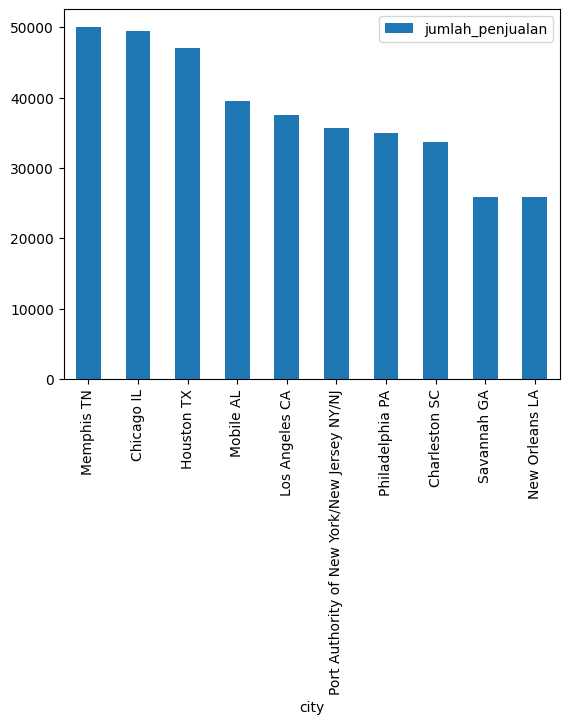

In [ ]:
# Melakukan plotting menggunakan data 10 teratas pada tabel.

jumlah_penjualan.plot(kind='bar',x='city',y='jumlah_penjualan')

Selanjutnya akan dilakukan pencarian city dengan jumlah pendapatan terbanyak, karena tidak menutup kemungkinan meskipun Memphis TN memiliki jumlah penjualan tertinggi, namun harga beli dan harga jual nya berbeda sedikit saja. Sehingga bisa menyebabkan city yang dibawahnya memiliki pendapatan lebih tinggi dari kota Memphis TN.

3. Mencari city dengan jumlah pendapatan terbanyak.

In [ ]:
# Membuat kolom baru untuk mendapatkan nilai pendapatan agar bisa dilakukan kalkulasi.
# Dikalkulasi dengan cara harga jual-harga beli dikalikan produk terjual

df['pendapatan']= (df['product_retail_price'] - df['cost']) * df['num_of_item']
df

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,num_of_item,product_distribution_center_id,city,year,month,pendapatan
386,167978,10250,2023-01-31 10:34:15+00:00,2023-02-28 03:05:15+00:00,26.90235,Sleep & Lounge,Hatley Labs On Plaid Flannel Nightdress,H,46.950001,Women,183F50A7700982A3ED18FF6D7A5777BF,1,8,Mobile AL,2023,1,20.047650
387,167978,10250,2023-01-31 10:34:15+00:00,2023-02-28 03:05:15+00:00,26.90235,Sleep & Lounge,Hatley Labs On Plaid Flannel Nightdress,H,46.950001,Women,183F50A7700982A3ED18FF6D7A5777BF,1,8,Mobile AL,2023,1,20.047650
388,167978,10250,2023-01-31 10:34:15+00:00,2023-02-28 03:05:15+00:00,26.90235,Sleep & Lounge,Hatley Labs On Plaid Flannel Nightdress,H,46.950001,Women,183F50A7700982A3ED18FF6D7A5777BF,1,8,Mobile AL,2023,1,20.047650
389,167978,10250,2023-01-31 10:34:15+00:00,2023-02-28 03:05:15+00:00,26.90235,Sleep & Lounge,Hatley Labs On Plaid Flannel Nightdress,H,46.950001,Women,183F50A7700982A3ED18FF6D7A5777BF,3,8,Mobile AL,2023,1,60.142951
390,167978,10250,2023-01-31 10:34:15+00:00,2023-02-28 03:05:15+00:00,26.90235,Sleep & Lounge,Hatley Labs On Plaid Flannel Nightdress,H,46.950001,Women,183F50A7700982A3ED18FF6D7A5777BF,1,8,Mobile AL,2023,1,20.047650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656343,395641,14581,2023-03-30 07:53:49+00:00,2023-04-26 10:56:49+00:00,10.46500,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,1,8,Mobile AL,2023,3,12.535000
656344,395641,14581,2023-03-30 07:53:49+00:00,2023-04-26 10:56:49+00:00,10.46500,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,1,8,Mobile AL,2023,3,12.535000
656345,395641,14581,2023-03-30 07:53:49+00:00,2023-04-26 10:56:49+00:00,10.46500,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,1,8,Mobile AL,2023,3,12.535000
656346,395641,14581,2023-03-30 07:53:49+00:00,2023-04-26 10:56:49+00:00,10.46500,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,3,8,Mobile AL,2023,3,37.605000


Telah ditambahkan kolom baru pendapatan, yang nilainya akan dikalkulasikan agar mendapatkan city dan produk dengan pendapatan tertinggi. Selanjutnya dilakukan pencarian jumlah pendapatan per city.

In [ ]:
# Melakukan grouping berdasarkan city, dimana pendapatan dijumlahkan.
# Direset indexnya agar bisa dipanggil kembali kolom yang telah di group.
# Diurutkan sesuai dengan nilai pendapatan tertinggi.
# Merubah nama kolom dari pendapatan menjadi jumlah_pendapatan.

jumlah_pendapatan=df.groupby("city")["pendapatan"].sum().reset_index().sort_values("pendapatan",ascending=False).rename({"pendapatan":"jumlah_pendapatan"},axis=1)
jumlah_pendapatan

,city,jumlah_pendapatan
2,Houston TX,3.375947e+06
4,Memphis TN,2.878345e+06
1,Chicago IL,2.742326e+06
5,Mobile AL,2.527045e+06
7,Philadelphia PA,2.189464e+06
8,Port Authority of New York/New Jersey NY/NJ,2.067388e+06
3,Los Angeles CA,1.972133e+06
9,Savannah GA,1.660925e+06
6,New Orleans LA,1.602159e+06
0,Charleston SC,1.314032e+06


Ternyata Houston TX memiliki jumlah pendapatan tertinggi di dibandingkan dengan kota Memphis TN. Bahkan kota Houston TX dan Memphis TN memiliki selisih pendapatan yang cukup jauh. Selanjutnya akan dilakukan proses visualisasi menggunakan plot agar tabel lebih mudah dibaca.

<Axes: xlabel='city'>

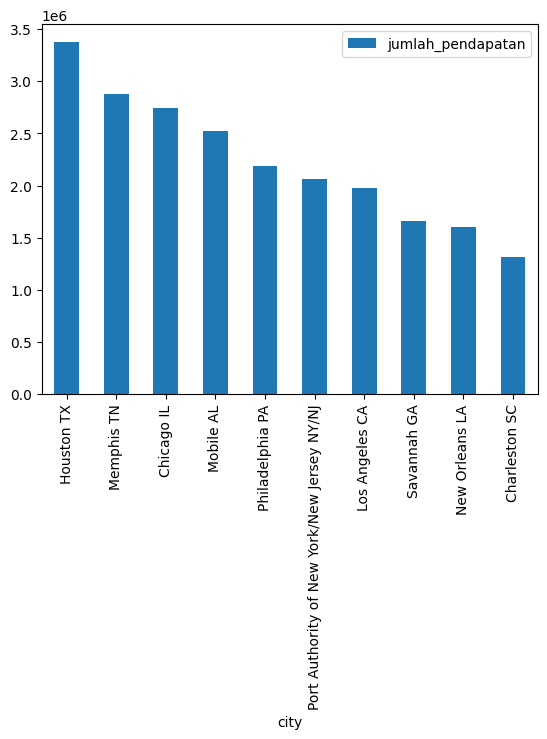

In [ ]:
# Melakukan plotting. 

jumlah_pendapatan.plot(kind="bar",x='city',y='jumlah_pendapatan')

4. Mencari penjualan produk tertinggi di Thelook Ecommerce.

In [ ]:
# Melakukan grouping berdasarkan produk.
# Melakukan kalkulasi dimana produk_terjual akan ditambahkan sesuai dengan nama produk.
# Direset index agar kolom grouping bisa dipanggil kembali untuk kalkulasi.
# Diurutkan menurut penjualan produk tertinggi.

penjualan_produk=df.groupby("product_name")["num_of_item"].sum() \
                    .reset_index().sort_values("num_of_item",ascending=False)
penjualan_produk

,product_name,num_of_item
21568,Volcom Men's Vorta Slim Straight Leg Fit Jean,297
20832,U.S. Polo Assn. Men's Woven Shirt With Vertica...,290
6604,Dickies WP114 Cotton Pleated Front Pant,280
4609,Capelli New York Rugby Stripe Brush Lined Slin...,280
16368,Perry Ellis Men's Long Sleeve Argyle V-Neck Sw...,279
...,...,...
6983,Dockers Women's Cargo Promo Short,1
219,2B Mila Studded Ponte Dress,1
11980,LAT Junior Fine Jersey V-Neck Tee Dress,1
6945,Dockers Men's Plush Open Bottom Jacket with Scarf,1


Ternyata Volcom Men's Vorta Slim Straight Leg Fit Jean adalah produk favorite, yang dimana produk itu yang paling banyak dibeli oleh customer. Selanjutnya akan dilakukan visualisasi menggunakan plot agar tabel lebih mudah dibaca.

<Axes: xlabel='product_name'>

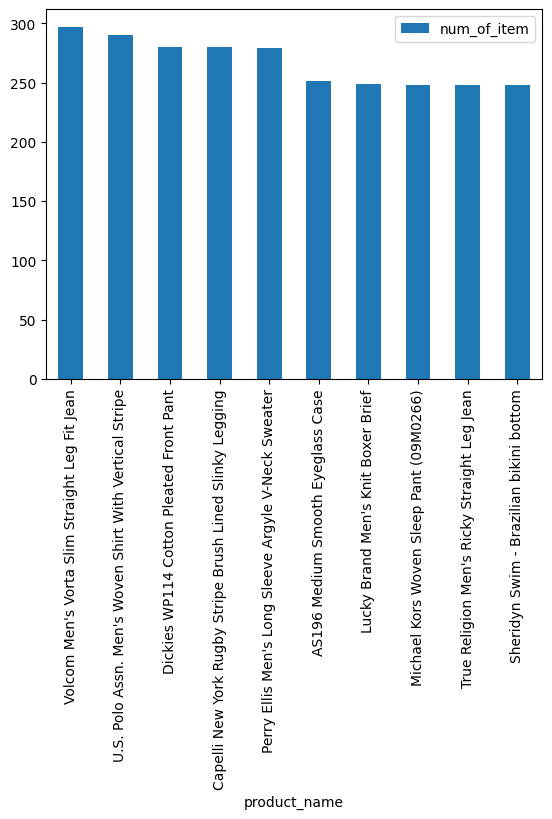

In [ ]:
# Melakukan plotting dengan mengambil 10 data awal dari tabel.

penjualan_produk.head(10).plot(kind="bar",x="product_name",y="num_of_item")

Plot hasil tabel penjualan, dimana diambil 10 jenis produk dengan penjualan tertinggi. Setelah ini penulis akan melakukan kalkulasi untuk mencari pendapatan produk tertinggi, karena tidak menutup kemungkinan meskipun produk Volcom Men's Vorta Slim Straight Leg Fit Jean memiliki penjualan terbanyak, namun pendapatan dari penjualan tersebut tidak terlalu baik. Oleh karena itu masih ada kemungkinan produk yang memiliki nilai penjualan tertinggi dipegang oleh produk lain.

5. Mencari pendapatan tertinggi

In [ ]:
# Melakukan grouping berdasarkan nama_produk.
# Pendapatan akan dijumlahkan sesuai dengan nama produk.
# Direset index agar kolom yang dipakai grouping bisa dipanggil kembali untuk kalkulasi.
# Mengganti nama kolom pendapatan menjadi pendapatan_USD.

pendapatan_produk=df.groupby("product_name")["pendapatan"].sum().reset_index() \
                     .sort_values("pendapatan",ascending=False)\
                     .rename({"pendapatan":"pendapatan_USD"},axis=1)
pendapatan_produk

,product_name,pendapatan_USD
19954,The North Face Apex Bionic Soft Shell Jacket -...,66734.408890
18603,Shephe 4 Ply Women's Classic Cashmere Robe wit...,44873.024075
19959,The North Face Freedom Mens Ski Pants 2013,37357.109883
19952,The North Face Apex Bionic Jacket - Men's,33255.683914
6709,Diesel Men's Lisardo Jacket,30453.407922
...,...,...
10013,Houndstooth Square Shawl,5.019420
8709,Gatta Flosie 4 Leggings,4.468540
19,'Sexy Legs' Exotic Print Fashion Leggings,3.842300
5997,Culotte Slips,3.131520


Ternyata untuk pendapatan Volcom Men's Vorta Slim Straight Leg Fit Jean tidak masuk di 5 teratas dengan pendapatan penjualan produk tertinggi, dan nanti akan kita liat apakah produk Volcom Men's Vorta Slim Straight Leg Fit Jean masuk 10 besar dalam pendapatan tertinggi, Sementara The North Face Apex Bionic Soft Shell Jacket - Men's memiliki jumlah pendapatan tertinggi meskipun penjualan dari produk tersebut 
tidak masuk dalam 10 penjualan produk terlaris. Selanjutnya akan dilakukan proses plotting agar tabel mudah dibaca.

<Axes: xlabel='product_name'>

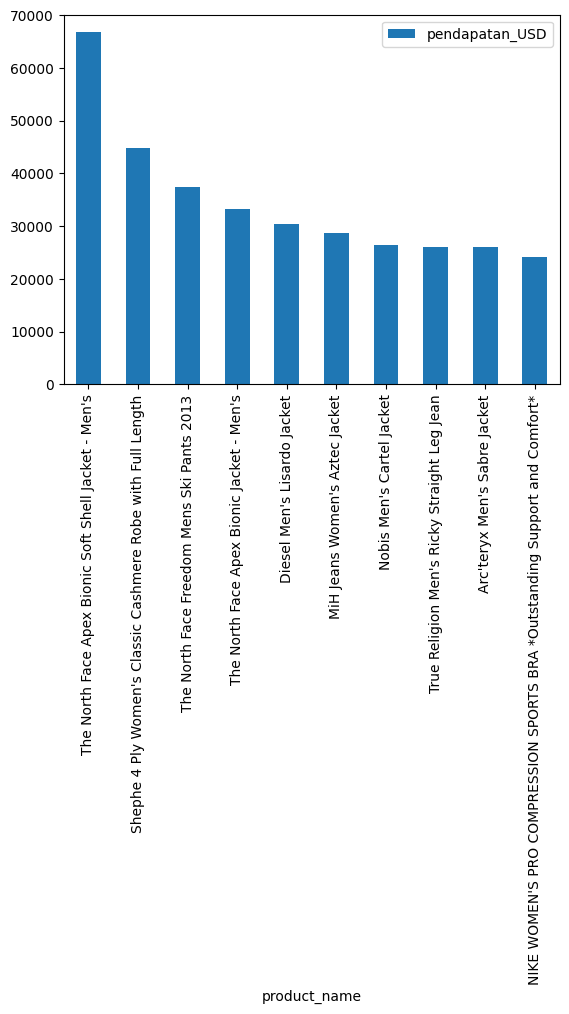

In [ ]:
# Melakukan plotting dengan mengambil 10 nilai awal pada tabel.

pendapatan_produk.head(10).plot(kind="bar",x='product_name',y='pendapatan_USD')

Plot yang dihasilkan oleh tabel diatas, dengan mengambil 10 nilai teratas dan ternyata produk Volcom Men's Vorta Slim Straight Leg Fit Jean tidak masuk dalam 10 pendapatan tertinggi meskipun produk tersebut paling banyak dibeli oleh customer. Selanjutnya penulis ingin mengetahui Produk apa saja yang disukai masyarakat masing masing county.

6. Mencari produk dengan penjualan tertinggi pada tiap city.

In [ ]:
# Dilakukan grouping berdasarkan city dan nama produk, lalu kolom produk_terjual dijumlahkan.
# Direset indexnya agar semua kolom bisa dipanggil kembali bila dibutuhkan untuk kalkulasi.
# Diurutkan menurut city, kemudian jumlah produk terjual. Dimana city berurutan A-Z sementara
# penjualan produk diurutkan dari nilai tertinggi.
# Merubah nama kolom produk_terjual menjadi jumlah_penjualan agar mudah dimengerti.

city_produk=df.groupby(['city', 'product_name'])["num_of_item"]\
                 .sum().reset_index().sort_values(['city','num_of_item']\
                 , ascending=[True,False]).rename({'num_of_item':'jumlah_penjualan'},axis=1)
city_produk

,city,product_name,jumlah_penjualan
1272,Charleston SC,Element Young men's Howland Short,224
1647,Charleston SC,Men's Kuhl Stovepipe Fleece Pullover,196
354,Charleston SC,Allegra K Lady Deep V Neck Long Sleeve Dots In...,186
1338,Charleston SC,ICECREAM Men's Long Sleeve Single Scoop Crewneck,176
490,Charleston SC,Allegra K Men Solid Black Straight Slant Pocke...,168
...,...,...,...
22770,Savannah GA,Splendid Women's Active Pullover,2
21521,Savannah GA,Affinitas intimates Linda Camisole White S,1
22715,Savannah GA,Sanctuary Clothing Women's Tab Nolita Shorts,1
22874,Savannah GA,Women's Charged CottonÂ® Sassy Scoop T-Shirt T...,1


Dihasilkan tabel diatas, tabel ini harus dilakukan proses lanjutan agar bisa menghasilkan data yang kita cari.

In [ ]:
# Dilakukan ranking menurut jumlah penjualan yang akan dipisahkan pada tiap city.
# Sehingga rank 1 tiap city berbeda.
# Dilakukan filtering dimana data yang diambil hanyalah yang memiliki rank 1.
# Difilter kolomnya dimana rank tidak akan diambil karena tidak terlalu berfungsi pada tabel baru.
# Dilakukan ranking kembali untuk melihat city dengan jumlah penjualan tertinggi
# Diurutkan menurut nilai jumlah penjualan tertinggi.

city_produk['rank']=city_produk.groupby('city')['jumlah_penjualan']\
                       .rank(method='first',ascending=False)
city_produk=city_produk.loc[city_produk['rank']==1]
city_produk=city_produk[['city','product_name','jumlah_penjualan']]
city_produk['rank']=city_produk['jumlah_penjualan'].rank(method='first',ascending=False)
city_produk=city_produk.sort_values('jumlah_penjualan', ascending=False)
city_produk

,city,product_name,jumlah_penjualan,rank
10132,Los Angeles CA,Volcom Men's Vorta Slim Straight Leg Fit Jean,297,1.0
19197,Philadelphia PA,U.S. Polo Assn. Men's Woven Shirt With Vertica...,290,2.0
10930,Memphis TN,Dickies WP114 Cotton Pleated Front Pant,280,3.0
15851,New Orleans LA,Capelli New York Rugby Stripe Brush Lined Slin...,280,4.0
20895,Port Authority of New York/New Jersey NY/NJ,Perry Ellis Men's Long Sleeve Argyle V-Neck Sw...,279,5.0
3990,Chicago IL,Michael Kors Woven Sleep Pant (09M0266),248,6.0
7644,Houston TX,Sheridyn Swim - Brazilian bikini bottom,248,7.0
21864,Savannah GA,Diesel Men's Zatiny Slim Micro-Bootcut 008AT Jean,245,8.0
15210,Mobile AL,Oneill Men's Superfreak Printed Boardshort,231,9.0
1272,Charleston SC,Element Young men's Howland Short,224,10.0


Disini produk Volcom Men's Vorta Slim Straight Leg Fit Jean	 paling banyak dibeli oleh customer yang berada di kota Los Angeles CA sedangkan kota Memphis TN yang memiliki jumlah kota dengan penjualan terbanyak paling banyak customernya membeli produk Dickies WP144 Cotton Pleated Front Pant.

# Overall Analysis

Dari analisa yang telah dilakukan, dapat beberapa poin yang bisa diambil

1. Jumlah City di Thelook Ecommerce adalah 10.
2. City yang memiliki penjualan tertinggi adalah Mempis TN.
3. City yang memiliki pendapatan tertinggi adalah Houston TX.
4. Produk yang paling disukai oleh customer Thelook Ecommerce adalah Volcom Men's Vorta Slim Straight Leg Fit Jean, meskipun tidak masuk 10 besar pada pendapatan tertinggi.
5. Produk yang memiliki pendapatan tertinggi adalah The North Face Apex Bionic Soft Shell Jacket - Men's, meskipun tidak berada di posisi 10 besar pada penjualan terbanyak.
6. Customer di city dengan penjualan tertinggi menyukai produk Dickies WP114 Cotton Pleated Front Pant.

Dapat disimpulkan bahwah kota dengan penjualan tertinggi belum tentung menjadi kota dengan penghasilan tertinggi, tapi dari data tersebut kita dapat memfokuskan penjualan pada kota Mempis TN dan Houston TX karna kedua kota tersebut memiliki perenan yang cukup besar dalam penjualan produk di Thelook Ecommerce. Dan pada produk Volcom Men's Vorta Slim Straight Leg Fit Jean dan juga The North Face Apex Bionic Soft Shell Jacket - Men's terlihat jika jika kedua produk tersebut yang memiliki jumlah pembelian dan pendapatan tertinggi jadi kita bisa untuk lebih meningkatkan meningkatkan stok dari kedua produk tersebut.


# Save Data

In [ ]:
df.to_csv('Shipping and Stock Performance Review on Q1 - Q2 2023 Cleaned.csv')